#  PROJECT 3: WEB APIs and NLP PART 2

#### Book 2: Data Cleaning and EDA

### Importing

In [1]:
     #imports
import numpy as np
import pandas as pd

import os
from os import path
from PIL import Image

    #visuals
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist

from bs4 import BeautifulSoup

import nltk
import regex as re

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

%matplotlib inline

### Loading Data

In [2]:
posts = pd.read_csv('data/all_posts.csv')
comments = pd.read_csv('data/all_comments.csv')

dc_posts = pd.read_csv('data/DCcomics_posts.csv')
dc_comments = pd.read_csv('data/DCcomics_comments.csv')
marvel_posts = pd.read_csv('data/Marvel_posts.csv')
marvel_comments = pd.read_csv('data/Marvel_comments.csv')

C:\Users\shaik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\shaik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 1. DATA CLEANING

### 1. 1 Posts Cleaning

In [3]:
posts.shape

(24991, 4)

In [4]:
posts

,Unnamed: 0,subreddit,selftext,title
0,0,DCcomics,Join please,Join the subreddit nerdyedits
1,1,DCcomics,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd
2,2,DCcomics,NaN,The most important element of Superman: Clark ...
3,3,DCcomics,NaN,father forgive me for I have sinned
4,4,DCcomics,NaN,[Cosplay] DCEU Wonder Woman by Lis.Wonder
...,...,...,...,...
24986,24986,Marvel,[removed],Marvel Wordle
24987,24987,Marvel,NaN,My drawing of Mar-Vell
24988,24988,Marvel,"in other words, Turn him into a diffrent chara...",Am I the only one who thinks that Deadpool Fro...
24989,24989,Marvel,NaN,Marvel Metal X-Men still contemplating whether...


In [5]:
    #Dropping unnecessary column
posts.drop(columns='Unnamed: 0', inplace=True)

In [6]:
posts.head()

,subreddit,selftext,title
0,DCcomics,Join please,Join the subreddit nerdyedits
1,DCcomics,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd
2,DCcomics,NaN,The most important element of Superman: Clark ...
3,DCcomics,NaN,father forgive me for I have sinned
4,DCcomics,NaN,[Cosplay] DCEU Wonder Woman by Lis.Wonder


In [7]:
    # Checking for duplicated rows
posts.duplicated().sum() 

619

In [8]:
    #Dropping duplicates
posts.drop_duplicates(keep='first', inplace=True)
posts.duplicated().sum() 

0

In [9]:
posts.duplicated().sum() 

0

In [10]:
posts.isnull().sum()

subreddit        0
selftext     15842
title            0
dtype: int64

In [11]:
    # replacing empty texts with '-'
posts.fillna('-', inplace=True)

In [12]:
posts.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [13]:
posts['subreddit'] = posts['subreddit'].str.lower()

In [14]:
posts['subreddit'].value_counts()

marvel      12277
dccomics    12095
Name: subreddit, dtype: int64

In [134]:
posts['all_text'] = posts['selftext'] + posts['title']

In [16]:
posts

,subreddit,selftext,title,all_text
0,dccomics,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits
1,dccomics,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...
2,dccomics,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...
3,dccomics,-,father forgive me for I have sinned,-father forgive me for I have sinned
4,dccomics,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder
...,...,...,...,...
24986,marvel,[removed],Marvel Wordle,[removed]Marvel Wordle
24987,marvel,-,My drawing of Mar-Vell,-My drawing of Mar-Vell
24988,marvel,"in other words, Turn him into a diffrent chara...",Am I the only one who thinks that Deadpool Fro...,"in other words, Turn him into a diffrent chara..."
24989,marvel,-,Marvel Metal X-Men still contemplating whether...,-Marvel Metal X-Men still contemplating whethe...


### 1.2 Comments Cleaning

In [17]:
comments.shape

(39979, 3)

In [18]:
comments

,Unnamed: 0,subreddit,body
0,0,DCcomics,"Same. Grew up with JLU and ngl, I've hated eve..."
1,1,DCcomics,"This. I love Power Girl, but a big part of tha..."
2,2,DCcomics,"People with super powers, didn’t even seem rac..."
3,3,DCcomics,[removed]
4,4,DCcomics,I definitely agree.
...,...,...,...
39974,39974,Marvel,"Yeah, there were multiple titles but they only..."
39975,39975,Marvel,I like Gorr and he was all in all well represe...
39976,39976,Marvel,The editor in chief
39977,39977,Marvel,[removed]


In [19]:
comments.drop(columns='Unnamed: 0', inplace=True)

In [20]:
comments.head()

,subreddit,body
0,DCcomics,"Same. Grew up with JLU and ngl, I've hated eve..."
1,DCcomics,"This. I love Power Girl, but a big part of tha..."
2,DCcomics,"People with super powers, didn’t even seem rac..."
3,DCcomics,[removed]
4,DCcomics,I definitely agree.


In [21]:
posts.duplicated().sum() 

0

In [22]:
posts.drop_duplicates(keep='first', inplace=True)
posts.duplicated().sum() 

0

In [23]:
comments.isnull().sum()

subreddit    0
body         0
dtype: int64

In [24]:
comments

,subreddit,body
0,DCcomics,"Same. Grew up with JLU and ngl, I've hated eve..."
1,DCcomics,"This. I love Power Girl, but a big part of tha..."
2,DCcomics,"People with super powers, didn’t even seem rac..."
3,DCcomics,[removed]
4,DCcomics,I definitely agree.
...,...,...
39974,Marvel,"Yeah, there were multiple titles but they only..."
39975,Marvel,I like Gorr and he was all in all well represe...
39976,Marvel,The editor in chief
39977,Marvel,[removed]


In [25]:
comments['subreddit'] = comments['subreddit'].str.lower()

In [26]:
comments.shape

(39979, 2)

In [27]:
    #Some comments are removed so they will be deleted.
comments = comments[~comments.body.str.contains("removed", case=False)]
comments.shape

(38503, 2)

In [28]:
    #Some comments have been deleted so they will also be removed.
comments = comments[~comments.body.str.contains("deleted", case=False)]
comments.shape

(38424, 2)

In [29]:
posts = posts[~posts.title.str.contains("removed", case=False)]
posts.shape

(24336, 4)

In [30]:
posts = posts[~posts.all_text.str.contains("removed", case=False)]
posts.shape

(21609, 4)

In [31]:
comments['subreddit'].value_counts(normalize=True)

marvel      0.51067
dccomics    0.48933
Name: subreddit, dtype: float64

In [32]:
#Removing website text for posts
for word in ["www.", "https", ".com", '#x200B', '&amp']:
    posts['all_text'] = [row.replace(word, '') for row in posts['all_text']]

In [33]:
# Removing website text for columns
for word in ["www.", "https", ".com", '#x200B', '&amp']:
    comments['body'] = [row.replace(word, '') for row in comments['body']]

### 1.3 Mapping

In [34]:
posts

,subreddit,selftext,title,all_text
0,dccomics,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits
1,dccomics,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...
2,dccomics,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...
3,dccomics,-,father forgive me for I have sinned,-father forgive me for I have sinned
4,dccomics,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder
...,...,...,...,...
24985,marvel,So in the new episode we see that theres anoth...,Little Moon Knight Theory I Had,So in the new episode we see that theres anoth...
24987,marvel,-,My drawing of Mar-Vell,-My drawing of Mar-Vell
24988,marvel,"in other words, Turn him into a diffrent chara...",Am I the only one who thinks that Deadpool Fro...,"in other words, Turn him into a diffrent chara..."
24989,marvel,-,Marvel Metal X-Men still contemplating whether...,-Marvel Metal X-Men still contemplating whethe...


In [35]:
posts['subreddit'] = [1 if i == 'dccomics' else 0 for i in posts['subreddit']]

In [36]:
posts

,subreddit,selftext,title,all_text
0,1,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits
1,1,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...
2,1,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...
3,1,-,father forgive me for I have sinned,-father forgive me for I have sinned
4,1,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder
...,...,...,...,...
24985,0,So in the new episode we see that theres anoth...,Little Moon Knight Theory I Had,So in the new episode we see that theres anoth...
24987,0,-,My drawing of Mar-Vell,-My drawing of Mar-Vell
24988,0,"in other words, Turn him into a diffrent chara...",Am I the only one who thinks that Deadpool Fro...,"in other words, Turn him into a diffrent chara..."
24989,0,-,Marvel Metal X-Men still contemplating whether...,-Marvel Metal X-Men still contemplating whethe...


In [37]:
comments

,subreddit,body
0,dccomics,"Same. Grew up with JLU and ngl, I've hated eve..."
1,dccomics,"This. I love Power Girl, but a big part of tha..."
2,dccomics,"People with super powers, didn’t even seem rac..."
4,dccomics,I definitely agree.
5,dccomics,Black manta
...,...,...
39973,marvel,Ewing and Rodriguez back to putting out the sl...
39974,marvel,"Yeah, there were multiple titles but they only..."
39975,marvel,I like Gorr and he was all in all well represe...
39976,marvel,The editor in chief


In [38]:
comments['subreddit'] = [1 if i == 'dccomics' else 0 for i in comments['subreddit']]

In [39]:
comments

,subreddit,body
0,1,"Same. Grew up with JLU and ngl, I've hated eve..."
1,1,"This. I love Power Girl, but a big part of tha..."
2,1,"People with super powers, didn’t even seem rac..."
4,1,I definitely agree.
5,1,Black manta
...,...,...
39973,0,Ewing and Rodriguez back to putting out the sl...
39974,0,"Yeah, there were multiple titles but they only..."
39975,0,I like Gorr and he was all in all well represe...
39976,0,The editor in chief


## 2.0 Preprocessing

### 2.1 Tokenizing

In [40]:
    #Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [41]:
  #Creating tokens for title and body columns
posts['tokens'] = posts['all_text'].apply(tokenizer.tokenize)
comments['tokens'] = comments['body'].apply(tokenizer.tokenize)

In [42]:
posts.head()

,subreddit,selftext,title,all_text,tokens
0,1,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits,"[Join, pleaseJoin, the, subreddit, nerdyedits]"
1,1,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...,"[I, m, looking, to, get, into, some, Jason, To..."
2,1,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...,"[The, most, important, element, of, Superman, ..."
3,1,-,father forgive me for I have sinned,-father forgive me for I have sinned,"[father, forgive, me, for, I, have, sinned]"
4,1,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder,"[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]"


In [43]:
comments.head()

,subreddit,body,tokens
0,1,"Same. Grew up with JLU and ngl, I've hated eve...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h..."
1,1,"This. I love Power Girl, but a big part of tha...","[This, I, love, Power, Girl, but, a, big, part..."
2,1,"People with super powers, didn’t even seem rac...","[People, with, super, powers, didn, t, even, s..."
4,1,I definitely agree.,"[I, definitely, agree]"
5,1,Black manta,"[Black, manta]"


### 2.2 Lemmatizer

In [44]:
    #Instatiate Lemmatizer
lemmatizer = WordNetLemmatizer()

In [45]:
    #Creating function for lemmatizing
def lemmatize_text(text):
     return [lemmatizer.lemmatize(i) for i in (text)]

In [46]:
    #Applying function to lemmatize token columns
posts['lem_tokens'] = posts['tokens'].apply(lemmatize_text)
comments['lem_tokens'] = comments['tokens'].apply(lemmatize_text)

In [47]:
posts.head()

,subreddit,selftext,title,all_text,tokens,lem_tokens
0,1,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits,"[Join, pleaseJoin, the, subreddit, nerdyedits]","[Join, pleaseJoin, the, subreddit, nerdyedits]"
1,1,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...,"[I, m, looking, to, get, into, some, Jason, To...","[I, m, looking, to, get, into, some, Jason, To..."
2,1,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...,"[The, most, important, element, of, Superman, ...","[The, most, important, element, of, Superman, ..."
3,1,-,father forgive me for I have sinned,-father forgive me for I have sinned,"[father, forgive, me, for, I, have, sinned]","[father, forgive, me, for, I, have, sinned]"
4,1,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder,"[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]","[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]"


In [48]:
comments.head()

,subreddit,body,tokens,lem_tokens
0,1,"Same. Grew up with JLU and ngl, I've hated eve...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h..."
1,1,"This. I love Power Girl, but a big part of tha...","[This, I, love, Power, Girl, but, a, big, part...","[This, I, love, Power, Girl, but, a, big, part..."
2,1,"People with super powers, didn’t even seem rac...","[People, with, super, powers, didn, t, even, s...","[People, with, super, power, didn, t, even, se..."
4,1,I definitely agree.,"[I, definitely, agree]","[I, definitely, agree]"
5,1,Black manta,"[Black, manta]","[Black, manta]"


### 2.3 Stemming

In [49]:
# Instantiate PorterStemmer.
p_stemmer = PorterStemmer()

In [50]:
# Creating function for Stemming
def porterstem_text(text):
    return [p_stemmer.stem(w) for w in (text)]

In [51]:
posts['stem_tokens'] = posts['tokens'].apply(porterstem_text)
comments['stem_tokens'] = comments['tokens'].apply(porterstem_text)

In [52]:
posts.head()

,subreddit,selftext,title,all_text,tokens,lem_tokens,stem_tokens
0,1,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits,"[Join, pleaseJoin, the, subreddit, nerdyedits]","[Join, pleaseJoin, the, subreddit, nerdyedits]","[join, pleasejoin, the, subreddit, nerdyedit]"
1,1,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...,"[I, m, looking, to, get, into, some, Jason, To...","[I, m, looking, to, get, into, some, Jason, To...","[i, m, look, to, get, into, some, jason, todd,..."
2,1,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...,"[The, most, important, element, of, Superman, ...","[The, most, important, element, of, Superman, ...","[the, most, import, element, of, superman, cla..."
3,1,-,father forgive me for I have sinned,-father forgive me for I have sinned,"[father, forgive, me, for, I, have, sinned]","[father, forgive, me, for, I, have, sinned]","[father, forgiv, me, for, i, have, sin]"
4,1,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder,"[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]","[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]","[cosplay, dceu, wonder, woman, by, li, wonder]"


In [53]:
comments.head()

,subreddit,body,tokens,lem_tokens,stem_tokens
0,1,"Same. Grew up with JLU and ngl, I've hated eve...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h...","[same, grew, up, with, jlu, and, ngl, i, ve, h..."
1,1,"This. I love Power Girl, but a big part of tha...","[This, I, love, Power, Girl, but, a, big, part...","[This, I, love, Power, Girl, but, a, big, part...","[thi, i, love, power, girl, but, a, big, part,..."
2,1,"People with super powers, didn’t even seem rac...","[People, with, super, powers, didn, t, even, s...","[People, with, super, power, didn, t, even, se...","[peopl, with, super, power, didn, t, even, see..."
4,1,I definitely agree.,"[I, definitely, agree]","[I, definitely, agree]","[i, definit, agre]"
5,1,Black manta,"[Black, manta]","[Black, manta]","[black, manta]"


### 2.4 Sentiment Analysis

In [54]:
    #Function for Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
def sentiment_score(post):
     return sia.polarity_scores(post)['compound']

In [55]:
posts['sentiment'] = posts['all_text'].apply(sentiment_score)
comments['sentiment'] = comments['body'].apply(sentiment_score)

In [56]:
posts.head()

,subreddit,selftext,title,all_text,tokens,lem_tokens,stem_tokens,sentiment
0,1,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits,"[Join, pleaseJoin, the, subreddit, nerdyedits]","[Join, pleaseJoin, the, subreddit, nerdyedits]","[join, pleasejoin, the, subreddit, nerdyedit]",0.2960
1,1,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...,"[I, m, looking, to, get, into, some, Jason, To...","[I, m, looking, to, get, into, some, Jason, To...","[i, m, look, to, get, into, some, jason, todd,...",0.3744
2,1,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...,"[The, most, important, element, of, Superman, ...","[The, most, important, element, of, Superman, ...","[the, most, import, element, of, superman, cla...",0.2716
3,1,-,father forgive me for I have sinned,-father forgive me for I have sinned,"[father, forgive, me, for, I, have, sinned]","[father, forgive, me, for, I, have, sinned]","[father, forgiv, me, for, i, have, sin]",0.2732
4,1,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder,"[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]","[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]","[cosplay, dceu, wonder, woman, by, li, wonder]",0.0000


In [57]:
comments.head()

,subreddit,body,tokens,lem_tokens,stem_tokens,sentiment
0,1,"Same. Grew up with JLU and ngl, I've hated eve...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h...","[same, grew, up, with, jlu, and, ngl, i, ve, h...",-0.7717
1,1,"This. I love Power Girl, but a big part of tha...","[This, I, love, Power, Girl, but, a, big, part...","[This, I, love, Power, Girl, but, a, big, part...","[thi, i, love, power, girl, but, a, big, part,...",0.9127
2,1,"People with super powers, didn’t even seem rac...","[People, with, super, powers, didn, t, even, s...","[People, with, super, power, didn, t, even, se...","[peopl, with, super, power, didn, t, even, see...",0.5994
4,1,I definitely agree.,"[I, definitely, agree]","[I, definitely, agree]","[i, definit, agre]",0.6369
5,1,Black manta,"[Black, manta]","[Black, manta]","[black, manta]",0.0000


### 2.5 Number of Words

In [58]:
posts['word_count']=[len(posts['tokens'][i]) for i in posts.index]
comments['word_count']=[len(comments['tokens'][i]) for i in comments.index]

In [59]:
posts.head()

,subreddit,selftext,title,all_text,tokens,lem_tokens,stem_tokens,sentiment,word_count
0,1,Join please,Join the subreddit nerdyedits,Join pleaseJoin the subreddit nerdyedits,"[Join, pleaseJoin, the, subreddit, nerdyedits]","[Join, pleaseJoin, the, subreddit, nerdyedits]","[join, pleasejoin, the, subreddit, nerdyedit]",0.2960,5
1,1,I’m looking to get into some Jason Todd/ RedHo...,Jason Todd,I’m looking to get into some Jason Todd/ RedHo...,"[I, m, looking, to, get, into, some, Jason, To...","[I, m, looking, to, get, into, some, Jason, To...","[i, m, look, to, get, into, some, jason, todd,...",0.3744,22
2,1,-,The most important element of Superman: Clark ...,-The most important element of Superman: Clark...,"[The, most, important, element, of, Superman, ...","[The, most, important, element, of, Superman, ...","[the, most, import, element, of, superman, cla...",0.2716,8
3,1,-,father forgive me for I have sinned,-father forgive me for I have sinned,"[father, forgive, me, for, I, have, sinned]","[father, forgive, me, for, I, have, sinned]","[father, forgiv, me, for, i, have, sin]",0.2732,7
4,1,-,[Cosplay] DCEU Wonder Woman by Lis.Wonder,-[Cosplay] DCEU Wonder Woman by Lis.Wonder,"[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]","[Cosplay, DCEU, Wonder, Woman, by, Lis, Wonder]","[cosplay, dceu, wonder, woman, by, li, wonder]",0.0000,7


In [60]:
comments.head()

,subreddit,body,tokens,lem_tokens,stem_tokens,sentiment,word_count
0,1,"Same. Grew up with JLU and ngl, I've hated eve...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h...","[Same, Grew, up, with, JLU, and, ngl, I, ve, h...","[same, grew, up, with, jlu, and, ngl, i, ve, h...",-0.7717,41
1,1,"This. I love Power Girl, but a big part of tha...","[This, I, love, Power, Girl, but, a, big, part...","[This, I, love, Power, Girl, but, a, big, part...","[thi, i, love, power, girl, but, a, big, part,...",0.9127,85
2,1,"People with super powers, didn’t even seem rac...","[People, with, super, powers, didn, t, even, s...","[People, with, super, power, didn, t, even, se...","[peopl, with, super, power, didn, t, even, see...",0.5994,10
4,1,I definitely agree.,"[I, definitely, agree]","[I, definitely, agree]","[i, definit, agre]",0.6369,3
5,1,Black manta,"[Black, manta]","[Black, manta]","[black, manta]",0.0000,2


### Combining Data

In [61]:
df = posts.append(comments)

In [62]:
df.tail()

,subreddit,selftext,title,all_text,tokens,lem_tokens,stem_tokens,sentiment,word_count,body
39973,0,NaN,NaN,NaN,"[Ewing, and, Rodriguez, back, to, putting, out...","[Ewing, and, Rodriguez, back, to, putting, out...","[ewe, and, rodriguez, back, to, put, out, the,...",0.1984,62,Ewing and Rodriguez back to putting out the sl...
39974,0,NaN,NaN,NaN,"[Yeah, there, were, multiple, titles, but, the...","[Yeah, there, were, multiple, title, but, they...","[yeah, there, were, multipl, titl, but, they, ...",0.1531,38,"Yeah, there were multiple titles but they only..."
39975,0,NaN,NaN,NaN,"[I, like, Gorr, and, he, was, all, in, all, we...","[I, like, Gorr, and, he, wa, all, in, all, wel...","[i, like, gorr, and, he, wa, all, in, all, wel...",-0.8220,78,I like Gorr and he was all in all well represe...
39976,0,NaN,NaN,NaN,"[The, editor, in, chief]","[The, editor, in, chief]","[the, editor, in, chief]",0.0000,4,The editor in chief
39978,0,NaN,NaN,NaN,[Agenda],[Agenda],[agenda],0.0000,1,Agenda


## 3.0 EDA

### 3.1 

### 3.2 Most Frequent Words by Word Cloud

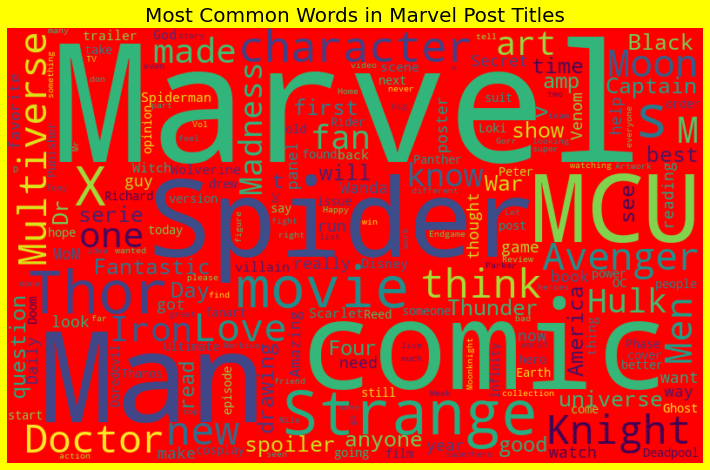

In [63]:
text1 = " ".join(title for title in marvel_posts.title)

stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(stopwords = stopwords, max_words=200, width=800, height=500, collocations = False, background_color = 'red').generate(text1)
fig = plt.figure(figsize=(20, 8),
                 facecolor= 'yellow')
# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')

plt.axis("off")
plt.title('Most Common Words in Marvel Post Titles', fontsize= 20)

plt.show()

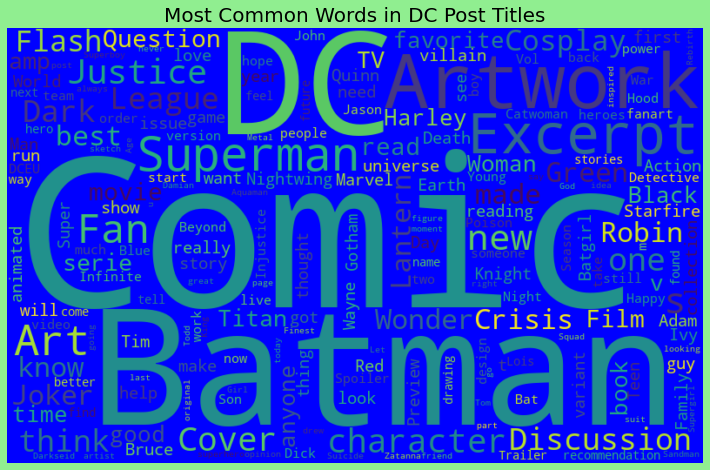

In [64]:
text2 = " ".join(title for title in dc_posts.title)

stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud( stopwords = stopwords, max_words= 200, width=800, height= 500, collocations = False, background_color = 'blue').generate(text2)
fig = plt.figure(figsize=(20, 8),
                 facecolor= 'lightgreen')

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")
plt.title('Most Common Words in DC Post Titles', fontsize=20)

plt.show()

### 3.3 Number of words per comment

C:\Users\shaik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


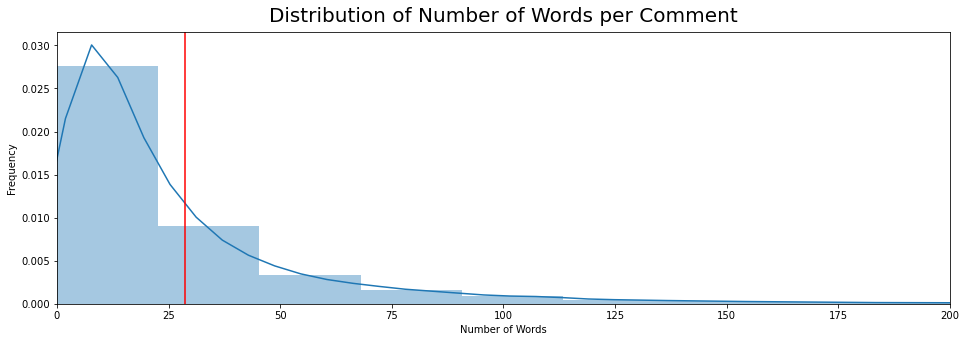

In [117]:
# Create distribution plot for word_count
plt.figure(figsize=(16,5))
plt.title('Distribution of Number of Words per Comment', size=10, pad=10, fontsize = 20)

sns.distplot(comments['word_count'])
plt.axvline(comments['word_count'].mean(), color='r', )

plt.xlim(xmin=0,xmax=200)

plt.xlabel('Number of Words', size=10)
plt.ylabel('Frequency', size=10)

plt.xticks(size=10)
plt.yticks(size=10);

### 3.3 



C:\Users\shaik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


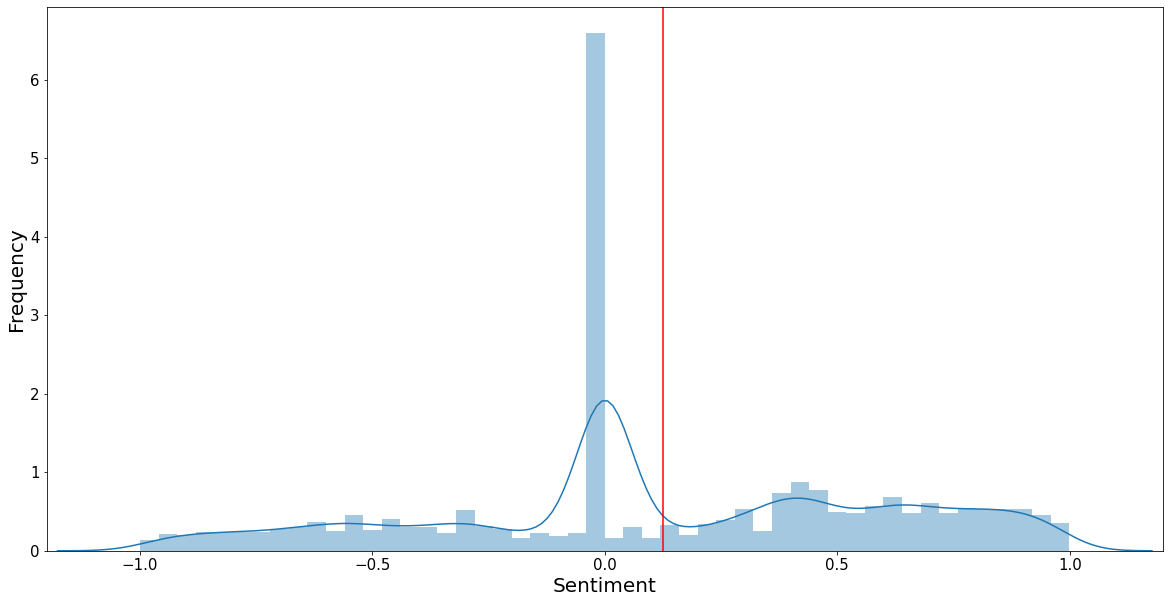

In [121]:
# Create distribution plot for sentiment
plt.figure(figsize=(20,10))
plt.title('', size=10, pad=10, fontsize=20)

sns.distplot(comments['sentiment'])
plt.axvline(comments['sentiment'].mean(), color='r', )

plt.xlim(xmin=-1.2,xmax= 1.2)

plt.xlabel('Sentiment', size=20)
plt.ylabel('Frequency', size=20)

plt.xticks(size=15)
plt.yticks(size=15);

<AxesSubplot:xlabel='subreddit', ylabel='sentiment'>

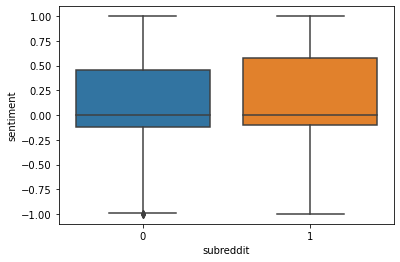

In [135]:
sns.boxplot(x='subreddit',y='sentiment',data=comments)


### Exporting

In [66]:
posts.to_csv('data/clean_pp_posts.csv')

In [67]:
comments.to_csv('data/clean_pp_comments.csv')